# Ellipsoids


In this file, we will visit the basic features provided by Dionysos for manipulating ellipsoids:
- inclusion
- intersection

First, let us import a few packages that are necessary to run this example.

In [1]:
using Dionysos
using StaticArrays
using LinearAlgebra
using Plots

The main package [Dionysos](https://github.com/dionysos-dev/Dionysos.jl) provides most important data structures that we will need.

In [2]:
const DI = Dionysos
const UT = DI.Utils

Dionysos.Utils

We define a plotting functions

In [3]:
function plot_config!(fig, El0, El, Elnew)
    if Elnew ∈ El0
        plot!(fig, El0; color = :red, label = "El0")
        plot!(fig, Elnew; color = :green, label = "Elnew")
    else
        plot!(fig, Elnew; color = :green, label = "Elnew")
        plot!(fig, El0; color = :red, label = "El0")
    end
    return plot!(fig, El; color = :blue, label = "El", show = true)
end

function analyze(fig1, fig2, i)
    El0 = E0L[i]
    Elnew = UT.scale_for_inclusion_contact_point(El0, El)
    plot_config!(fig1, El0, El, Elnew)
    println(El0 ∈ El ? "El0 ∈ El" : "El0 ∉ El")

    Elnew = UT.scale_for_noninclusion_contact_point(El0, El)
    plot_config!(fig2, El0, El, Elnew)
    return println(UT.intersect(El0, El) ? "El0 ∩ El ≠ ∅" : "El0 ∩ El = ∅")
end

analyze (generic function with 1 method)

We define some ellipsoids

In [4]:
c = [1.5; 1.5]
P = [
    4.0 0.5
    0.5 6.0
]
El = UT.Ellipsoid(P, c)

P0 = [
    0.4 -0.1
    -0.1 0.5
]
vals = [4.1, 3.32, 2.8, 2.4]
E0L = [UT.Ellipsoid(P0, [c0x; c0x - 0.2]) for c0x in vals]

4-element Vector{Dionysos.Utils.Ellipsoid{Float64, Matrix{Float64}, Vector{Float64}}}:
 Dionysos.Utils.Ellipsoid{Float64, Matrix{Float64}, Vector{Float64}}([0.4 -0.1; -0.1 0.5], [4.1, 3.8999999999999995])
 Dionysos.Utils.Ellipsoid{Float64, Matrix{Float64}, Vector{Float64}}([0.4 -0.1; -0.1 0.5], [3.32, 3.1199999999999997])
 Dionysos.Utils.Ellipsoid{Float64, Matrix{Float64}, Vector{Float64}}([0.4 -0.1; -0.1 0.5], [2.8, 2.5999999999999996])
 Dionysos.Utils.Ellipsoid{Float64, Matrix{Float64}, Vector{Float64}}([0.4 -0.1; -0.1 0.5], [2.4, 2.1999999999999997])

### Case 1: non intersection

In [5]:
fig1_1 = plot(; aspect_ratio = :equal);
fig1_2 = plot(; aspect_ratio = :equal);
analyze(fig1_1, fig1_2, 1)

El0 ∉ El
El0 ∩ El = ∅


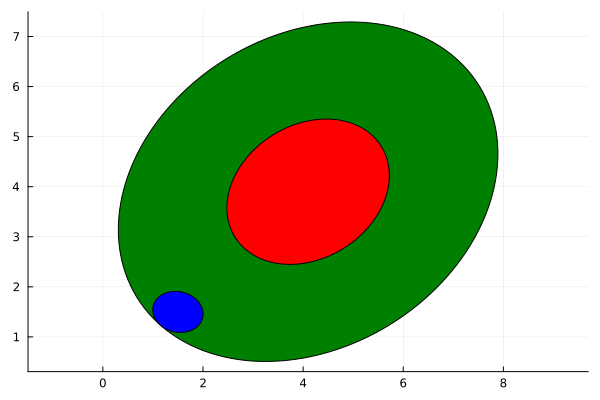

In [6]:
plot!(fig1_1)

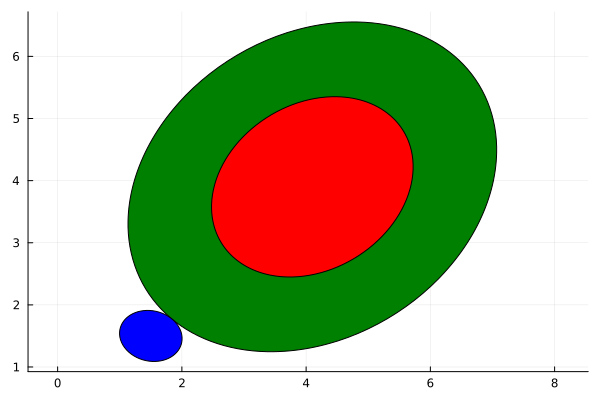

In [7]:
plot!(fig1_2)

### Case 2: non intersection

In [8]:
fig2_1 = plot(; aspect_ratio = :equal);
fig2_2 = plot(; aspect_ratio = :equal);
analyze(fig2_1, fig2_2, 2)

El0 ∉ El
El0 ∩ El = ∅


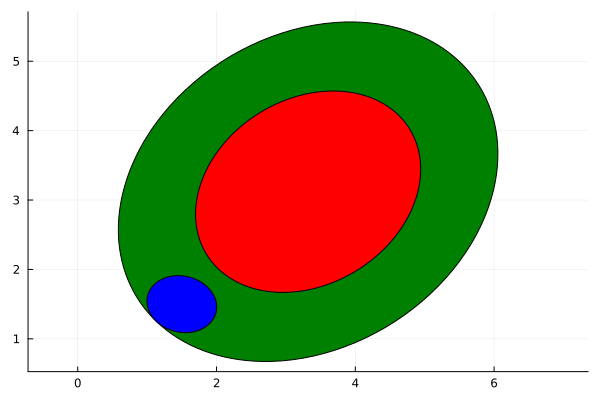

In [9]:
plot!(fig2_1)

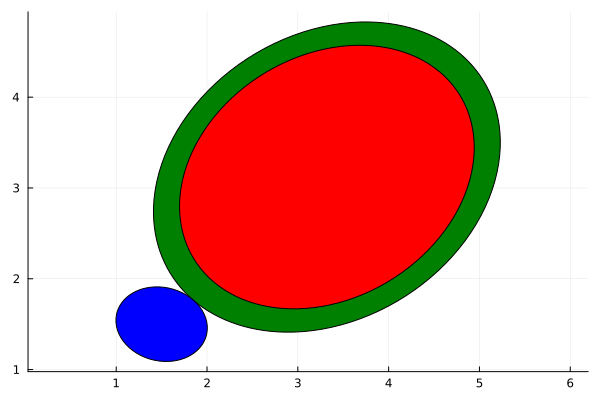

In [10]:
plot!(fig2_2)

### Case 3: intersection, non inclusion

In [11]:
fig3_1 = plot(; aspect_ratio = :equal);
fig3_2 = plot(; aspect_ratio = :equal);
analyze(fig3_1, fig3_2, 3)

El0 ∉ El
El0 ∩ El ≠ ∅


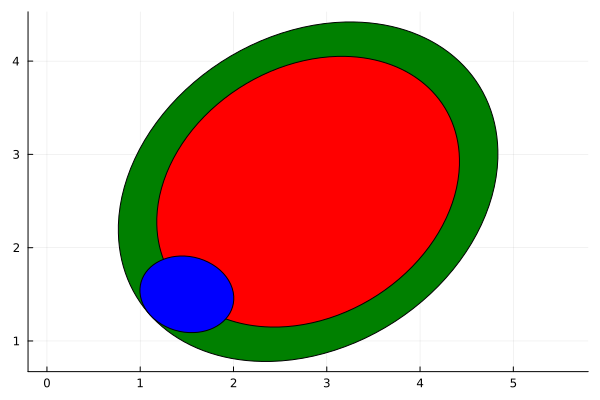

In [12]:
plot!(fig3_1)

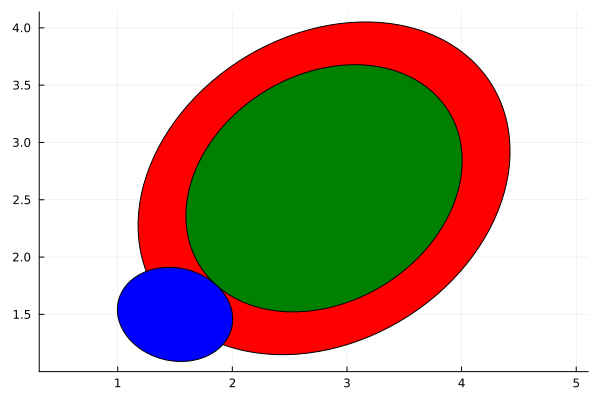

In [13]:
plot!(fig3_2)

### Case 4: inclusion

In [14]:
fig4_1 = plot(; aspect_ratio = :equal);
fig4_2 = plot(; aspect_ratio = :equal);
analyze(fig4_1, fig4_2, 4)

El0 ∉ El
El0 ∩ El ≠ ∅


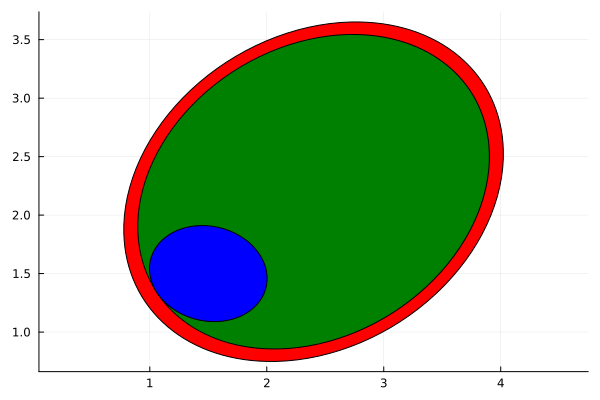

In [15]:
plot!(fig4_1)

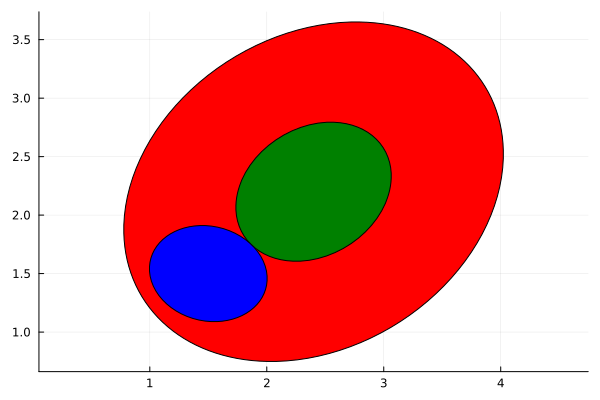

In [16]:
plot!(fig4_2)

---

*This notebook was generated using [Literate.jl](https://github.com/fredrikekre/Literate.jl).*